<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.215333,24.104131,0.256995,72.576459,72.375354,0.201104
1,0.0,1.0,26.767247,70.076414,0.009897,106.853558,106.852296,0.001263
2,0.0,2.0,92.619502,37.422225,0.103057,140.144784,140.038198,0.106586
3,0.0,3.0,90.383373,86.364006,0.017852,186.765231,186.685657,0.079574
4,0.0,4.0,98.504101,75.865400,-0.120107,184.249394,184.314208,-0.064814
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.219298,63.591793,0.098784,168.909874,168.829399,0.080476
19996,999.0,16.0,56.854349,74.528548,0.035115,141.418012,141.381277,0.036734
19997,999.0,17.0,50.425421,51.808109,0.257794,112.491323,112.242428,0.248895
19998,999.0,18.0,84.612591,62.567787,-0.114920,157.065458,157.195461,-0.130003


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.215333,24.104131,0.256995,72.576459,72.375354,0.201104
1,0.0,1.0,26.767247,70.076414,0.009897,106.853558,106.852296,0.001263
2,0.0,2.0,92.619502,37.422225,0.103057,140.144784,140.038198,0.106586
3,0.0,3.0,90.383373,86.364006,0.017852,186.765231,186.685657,0.079574
4,0.0,4.0,98.504101,75.865400,-0.120107,184.249394,184.314208,-0.064814
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.219298,63.591793,0.098784,168.909874,168.829399,0.080476
19996,999.0,16.0,56.854349,74.528548,0.035115,141.418012,141.381277,0.036734
19997,999.0,17.0,50.425421,51.808109,0.257794,112.491323,112.242428,0.248895
19998,999.0,18.0,84.612591,62.567787,-0.114920,157.065458,157.195461,-0.130003


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

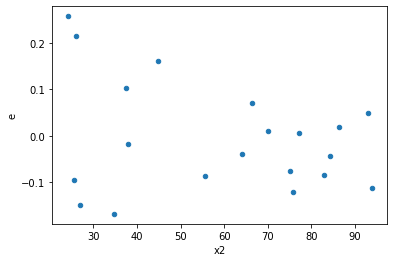

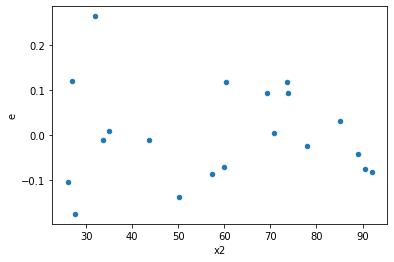

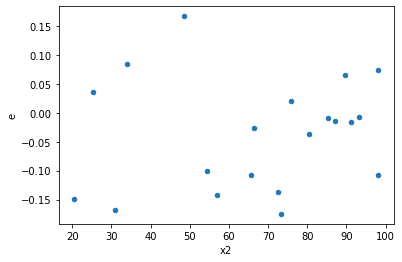

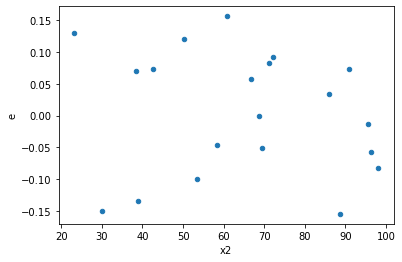

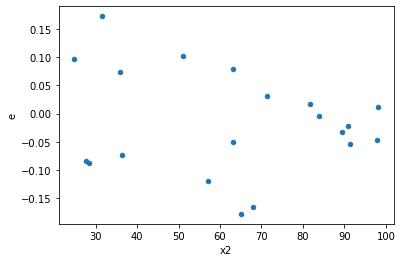

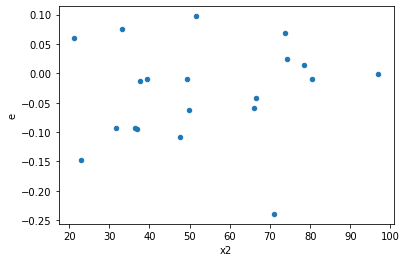

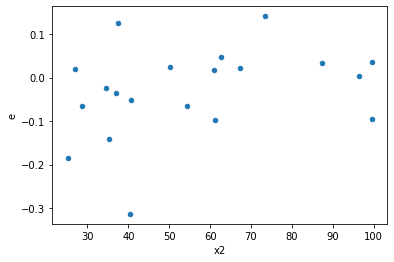

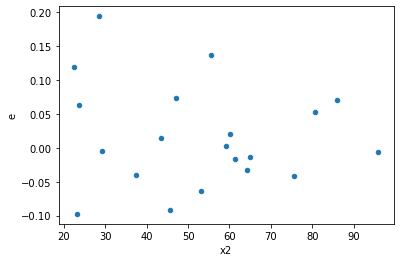

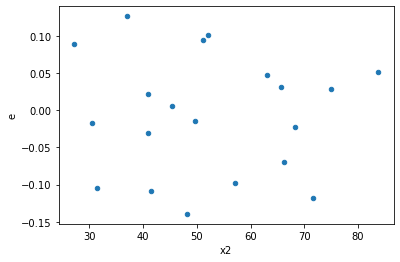

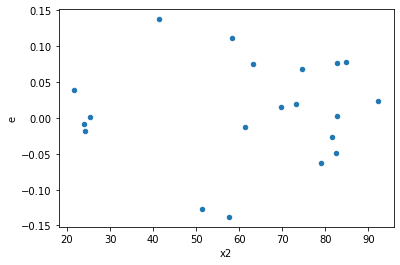

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,3.0,13.0,0.011528318971665622,0.19914910401302388,0.0038427729905552072,0.015319161847155684,3.986486291229594,0.0647720202647113,0.9676139898676444,0.03238601013235565,Reject001=1 : Homoscedasticity
1.0,12.0,4.0,0.1123597147429276,0.07196856173687223,0.009363309561910633,0.017992140434218058,1.9215577905710794,0.5546929873670003,0.7226535063164998,0.2773464936835002,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,0.02560920267350052,0.07016807338992634,0.0036584575247857886,0.007796452598880704,2.1310764293586284,0.28767982995179153,0.8561600850241042,0.14383991497589577,Reject001=1 : Homoscedasticity
3.0,5.0,11.0,0.05124085189467692,0.11399575073622743,0.010248170378935384,0.010363250066929766,1.0112292910577407,0.9115393552569797,0.5442303223715101,0.45576967762848986,Reject001=1 : Homoscedasticity
5.0,2.0,14.0,0.0025380924062497977,0.0877235789323443,0.0012690462031248989,0.0062659699237388785,4.937542784738299,0.04767730382641089,0.9761613480867946,0.023838651913205444,Reject001=1 : Homoscedasticity
8.0,12.0,4.0,0.06035242019681962,0.029560135711331627,0.005029368349734969,0.007390033927832907,1.4693761550041045,0.7627973005496302,0.6186013497251849,0.3813986502748151,Reject001=1 : Homoscedasticity
9.0,12.0,4.0,0.04788588809352889,0.020424366474327132,0.003990490674460741,0.005106091618581783,1.2795648543325564,0.8831088270903735,0.5584455864548132,0.44155441354518676,Reject001=1 : Homoscedasticity
10.0,10.0,6.0,0.027501876061204782,0.11029359313798666,0.0027501876061204783,0.018382265522997775,6.68400420469079,0.030368367932712692,0.9848158160336437,0.015184183966356346,Reject001=1 : Homoscedasticity
13.0,2.0,14.0,0.0019452124670560362,0.16894780976009188,0.0009726062335280181,0.01206770069714942,12.407591357270263,0.0015882351428386787,0.9992058824285807,0.0007941175714193394,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,3.0,13.0,0.011528318971665622,0.19914910401302388,0.0038427729905552072,0.015319161847155684,3.986486291229594,0.0647720202647113,Reject001=1 : Homoscedasticity
1.0,12.0,4.0,0.1123597147429276,0.07196856173687223,0.009363309561910633,0.017992140434218058,1.9215577905710794,0.5546929873670003,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,0.02560920267350052,0.07016807338992634,0.0036584575247857886,0.007796452598880704,2.1310764293586284,0.28767982995179153,Reject001=1 : Homoscedasticity
3.0,5.0,11.0,0.05124085189467692,0.11399575073622743,0.010248170378935384,0.010363250066929766,1.0112292910577407,0.9115393552569797,Reject001=1 : Homoscedasticity
4.0,6.0,10.0,0.05892205024472455,0.030877169892815002,0.009820341707454092,0.0030877169892815004,0.3144205243833604,0.16981764439543376,Reject001=1 : Homoscedasticity
5.0,2.0,14.0,0.0025380924062497977,0.0877235789323443,0.0012690462031248989,0.0062659699237388785,4.937542784738299,0.04767730382641089,Reject001=1 : Homoscedasticity
6.0,13.0,3.0,0.10965439770933458,0.023823755318730985,0.008434953669948814,0.007941251772910328,0.9414695188193628,0.7974779474094508,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,0.04708480633538156,0.01710819897531993,0.005885600791922695,0.0021385248719149913,0.3633486108758631,0.17361467412948053,Reject001=1 : Homoscedasticity
8.0,12.0,4.0,0.06035242019681962,0.029560135711331627,0.005029368349734969,0.007390033927832907,1.4693761550041045,0.7627973005496302,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      882
Reject001=0 : Heteroscedasticity    118
Name: Result_test, dtype: int64